# Name: Shimin TU
# Username: ShiminTu

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import altair as alt

In [5]:
shootings = pd.read_csv("C:/Users/WIN10/Desktop/MUSA550/assignment-2/data/shootings.csv")
shootings = shootings.loc[shootings["year"] < 2021].sort_values('year',ascending = False) # data of 2021 is incomplete

## A grouped barchat using Matplotlib
Matplotlib is the most classic and flexible library and is suitable for plotting simple charts like a bar chart. This bar chart visualizes the number of shooting victims grouped by sex from 2015 to 2020. On the one hand, the chart shows the trend of shooting victims grouped by sex. On the other hand, it also compares the number of victims between males and females every year.

In [6]:
shootings_sex = shootings.groupby(["year","sex"]).size().reset_index(name = 'counts')
shootings_wide = shootings_sex.pivot(index = 'year',columns = 'sex',values = 'counts').reset_index()
shootings_wide.head()

sex,year,F,M
0,2015,102,1156
1,2016,93,1207
2,2017,90,1148
3,2018,124,1313
4,2019,138,1338


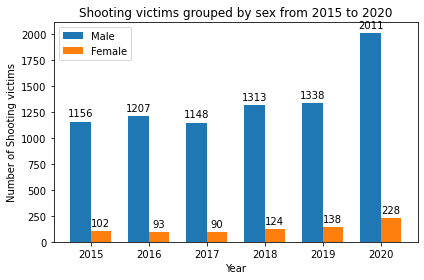

In [10]:
# a barchart showing the numebr of shooting victims grouped by sex from 2015 to 2020
x = np.arange(len(shootings_wide['year']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, shootings_wide['M'], width, label='Male')
rects2 = ax.bar(x + width/2, shootings_wide['F'], width, label='Female')

ax.set_ylabel('Number of Shooting victims')
ax.set_xlabel('Year')
ax.set_title('Shooting victims grouped by sex from 2015 to 2020')
ax.set_xticks(x)
ax.set_xticklabels(shootings_wide['year'])
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

### Conclusion:
In every year between 2015 and 2020, the number of male victims was greater than that of female victims. As for a general trend, the number of victims of each sex fluctuated in the first five years, and both reached a peak in 2020.

## A heat map using seaborn
It is much clearer and explicit to use heatmaps to understand how data distributes and varies. Here I want to visualize the number of shooting victims of 72 months in 6 years which is relatively complicated, so a heatmap is a good choice.

In [50]:
shootings["date_"]=pd.to_datetime(shootings["date_"])
shootings["Month"]=shootings["date_"].dt.month_name()
shootings_month=shootings.groupby(["year","Month"],as_index=False).size().copy()
shootings_month_wide=shootings_month.pivot("year","Month","size")
a = ["January","February","March","April","May","June","July","August","September","October","November","December"]
shootings_month_wide=shootings_month_wide.reindex(columns=a)
shootings_month_wide.head()


Month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2015,80,49,64,69,120,111,145,160,122,97,97,121
2016,93,79,97,98,92,106,153,147,108,100,115,88
2017,95,77,83,113,111,106,115,94,124,112,94,98
2018,83,100,81,104,145,123,121,145,124,145,118,126
2019,87,78,128,118,113,146,126,150,122,158,118,115


Text(0.5, 1.0, ' The number of shooting victims every month from 2015 to 2020')

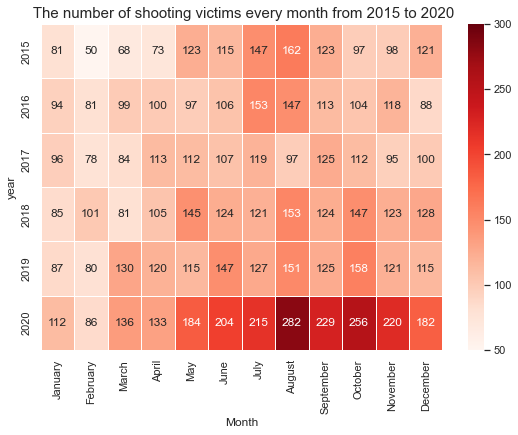

In [8]:
# a seaborn heatmap 
sns.set_theme()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(shootings_month_wide, 
            annot=True, 
            fmt="d", 
            linewidths=.5, 
            ax=ax,
            vmin=50,
            vmax=300,
            cmap="Reds",
           )
ax.set_title(" The number of shooting victims every month from 2015 to 2020",size=15)

### Conclusion
The number of victims was the least in February 2015 and was the most in August 2020. And the number of victims in 2020 has increased dramatically over the previous five years.

## A line chart using Altair
This line chart visualizes the fatal rate of the Asian, the black, and the white from 2015 to 2020.

In [38]:
shootings=shootings.dropna(subset=["fatal","race","year","age"])
shootings=shootings.loc[shootings["race"]!="I"] # only has one-year data, which is not enought to analyze
shootings=shootings.loc[shootings["race"]!="U"]
shootings.loc[(shootings['race'] == 'A'), 'race'] = 'Asian'
shootings.loc[(shootings['race'] == 'B'), 'race'] = 'Black'
shootings.loc[(shootings['race'] == 'W'), 'race'] = 'White'

In [49]:
shootings_number=shootings.groupby(['year','race'],as_index=False).size()
shootings_number
shootings_f=shootings.loc[shootings["fatal"]== 1]
shootings_fatal=shootings_f.groupby(["year","race"],as_index=False).size()
shootings_fatal=shootings_fatal.merge(shootings_number,on=["year","race"])
shootings_fatal["fatal_rate"]=round(shootings_fatal["size_x"]/shootings_fatal["size_y"],2)
shootings_fatal.head()


,year,race,size_x,size_y,fatal_rate
0,2015,Asian,3,11,0.27
1,2015,Black,185,1037,0.18
2,2015,White,41,187,0.22
3,2016,Black,192,1049,0.18
4,2016,White,44,219,0.20


In [48]:
alt.Chart(shootings_fatal,title="The fatal rate of shooting crimes grouped by race from 2015 to 2020").mark_line().encode(
        alt.X('year:O',scale=alt.Scale(zero=False)),
        alt.Y('fatal_rate:Q', axis=alt.Axis(format='%'),scale=alt.Scale(zero=False)),
        color='race:N',
        tooltip=alt.Tooltip(["race:N","fatal_rate:Q","year:Q"]),
).properties(width=400,height=300).interactive()

alt.Chart(...)

### Conclusions:
The fatal rate of the Asian was much higher in 2015 and 2020 than that of other two races. Generally, the fatal rates of the white and the black were not much different.

## Histogram with a responsive bin
The blow chart is a histogram visualizing the number of shooting victims of each age in 2020,and when you drag and click on this pannel, the top pannel's bins will change. It allows us to view the specific situation in each age bin.

In [42]:
shootings_2020=shootings.loc[shootings["year"]==2020]

brush = alt.selection_interval(encodings=['x'])

base = alt.Chart(shootings_2020,title="The age distribution of shooting victims in 2020").mark_bar().encode(
    y='count():Q'
).properties(
    width=600,
    height=100
)
alt.vconcat(
  base.encode(
    alt.X('age:Q',
      bin=alt.Bin(maxbins=30, extent=brush),
      scale=alt.Scale(domain=brush,zero=False)
    )
  ),
  base.encode(
    alt.X('age:Q', bin=alt.Bin(maxbins=30)),
  ).add_selection(brush)
)

alt.VConcatChart(...)

## Conclusions:
The age of shooting victims in 2020 mainly concentrated between 15 to 45 years old, and victims who were younger than 15 and older than 60 were much fewer. More specifically, the number of 21-year-old victims is the highest.

## Selection histogram using Altair
This chart consists of one scatter chart and one histogram. The scatter chart visualizes the longitude and latitude of every victim being shooted in 2020 grouped by race,and the histogram below shows the number of victims being selected in the scatter chart with an interval selection.

In [45]:
shootings_2020.dropna(subset=["lng","lat"])
shootings_2020=shootings_2020.loc[shootings_2020["Month"]=="August"]

brush = alt.selection(type='interval')

points = alt.Chart(shootings_2020,title='Longtudes and latitudes of shootings in 2020 grouped by race').mark_circle().encode(
    x="lng:Q",
    y='lat:Q',
    color=alt.condition(brush, 'race:N', alt.value('lightgray'))
).add_selection(
    brush
).interactive()

bars = alt.Chart(shootings_2020,title='The number of shooting victims').mark_bar().encode(
    y='race:N',
    color='race:N',
    x='count(race):Q'
).transform_filter(
    brush
)

points & bars

alt.VConcatChart(...)

### Conclusions:
In general, the number of black victims was much greater than that of white victims in 2020.The white victims were shooted mainly in northeast philadelphia,while the location of black victims being shooted distributed more evenly. Something needs attention is that this scatter chart doesn't show the accurate distance between points.